In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import helper as hp

current_path = os.getcwd()

STOCKS = ["TSLA"]
START_DATE = hp.START_DATE
END_DATE = hp.END_DATE

In [4]:
# data fetching 
lag = 5
stock_data = {}
for stock in STOCKS:
    data_path = os.path.join(current_path, "data", f"{stock}_{START_DATE}_{END_DATE}.csv")
    data = pd.read_csv(data_path)
    stock_data[stock] = data
df_stock = stock_data['TSLA']
df_stock['Date'] = pd.to_datetime(df_stock['Date']).dt.date
df_stock[f'Return_{lag}_days_later'] = (df_stock['Close'].shift(-lag) - df_stock['Close'])/df_stock['Close'] * 100

In [5]:
df_0 = pd.read_csv('predicted_label_data\predictions_stock_tweets_filtered_TSLA.csv')
df_1 = pd.read_csv('predicted_label_data\predictions_Tweet_filtered_TSLA.csv')
df_2 = pd.read_csv('predicted_label_data\predictions_tweets_remaining_filtered_TSLA.csv')

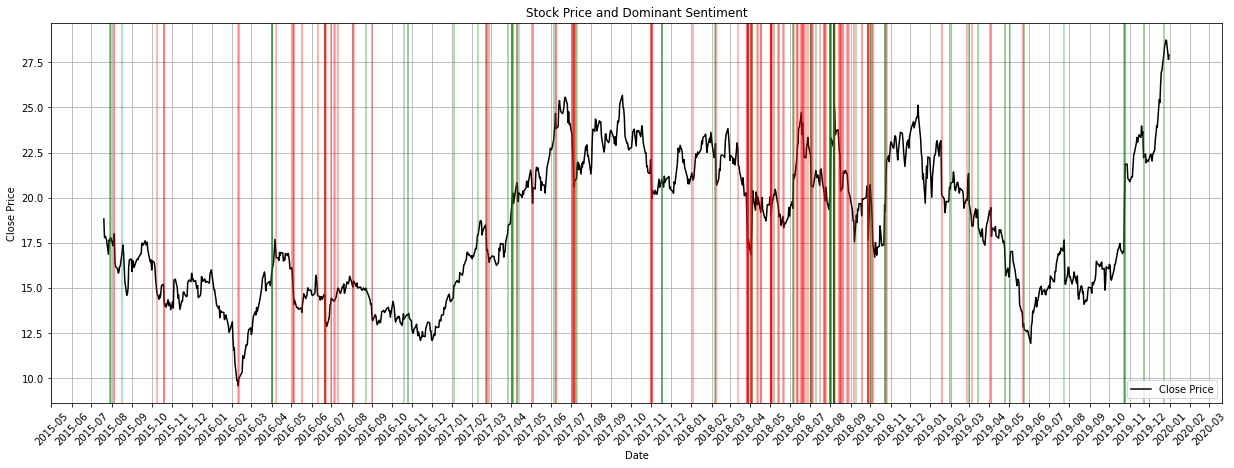

In [13]:
df_0_summary = hp.calculate_sentiment_summary(df_0, window_size = 40, threshold=1.5)
df_1_summary = hp.calculate_sentiment_summary(df_1, window_size = 500, threshold=2, min_periods=200)
df_2_summary = hp.calculate_sentiment_summary(df_2, window_size = 40, threshold=1.5)

df_stock_sentiment = df_stock.merge(df_1_summary, left_on='Date', right_on='date', how='inner')
hp.plot_stock_sentiment(df_stock_sentiment)

,daily_positive_sentiment,daily_negative_sentiment,dominant_sentiment,z_score_positive,z_score_negative
0,319.866348,104.133653,0,0.480001,0.190144
1,334.599759,233.400239,0,0.573759,1.869140
2,238.102337,88.897662,0,-0.053625,-0.019436
3,304.910508,32.089492,0,0.380831,-0.760796
4,188.475844,53.524156,0,-0.378758,-0.478227
...,...,...,...,...,...
1117,826.614594,468.385406,0,0.416563,0.072165
1118,825.663536,392.336461,0,0.422025,-0.182491
1119,909.713893,414.286107,0,0.648686,-0.103298
1120,897.839532,535.160468,0,0.639157,0.342302


In [24]:
import statsmodels.api as sm


predictor = ['daily_positive_sentiment', 'daily_negative_sentiment', 'dominant_sentiment', 'z_score_positive', 'z_score_negative']
X = df_stock_sentiment[predictor]
X = sm.add_constant(X)
Y = df_stock_sentiment[f'Return_{lag}_days_later'] > 0
model = sm.Logit(Y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.687880
         Iterations 4
                            Logit Regression Results                           
Dep. Variable:     Return_5_days_later   No. Observations:                 1122
Model:                           Logit   Df Residuals:                     1116
Method:                            MLE   Df Model:                            5
Date:                 Wed, 29 Nov 2023   Pseudo R-squ.:                0.002325
Time:                         23:44:25   Log-Likelihood:                -771.80
converged:                        True   LL-Null:                       -773.60
Covariance Type:             nonrobust   LLR p-value:                    0.6088
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.0876      0.194     -0.451      0.652    

In [27]:
df_stock_sentiment[predictor]

,daily_positive_sentiment,daily_negative_sentiment,dominant_sentiment,z_score_positive,z_score_negative
0,319.866348,104.133653,0,0.480001,0.190144
1,334.599759,233.400239,0,0.573759,1.869140
2,238.102337,88.897662,0,-0.053625,-0.019436
3,304.910508,32.089492,0,0.380831,-0.760796
4,188.475844,53.524156,0,-0.378758,-0.478227
...,...,...,...,...,...
1117,826.614594,468.385406,0,0.416563,0.072165
1118,825.663536,392.336461,0,0.422025,-0.182491
1119,909.713893,414.286107,0,0.648686,-0.103298
1120,897.839532,535.160468,0,0.639157,0.342302
